# JSBSim Output

We want to compare the output of JSBSim to the charts found in the original papers.

First  we start with an overview of the first three stage's altitude, velocity, and acceleration time histories.

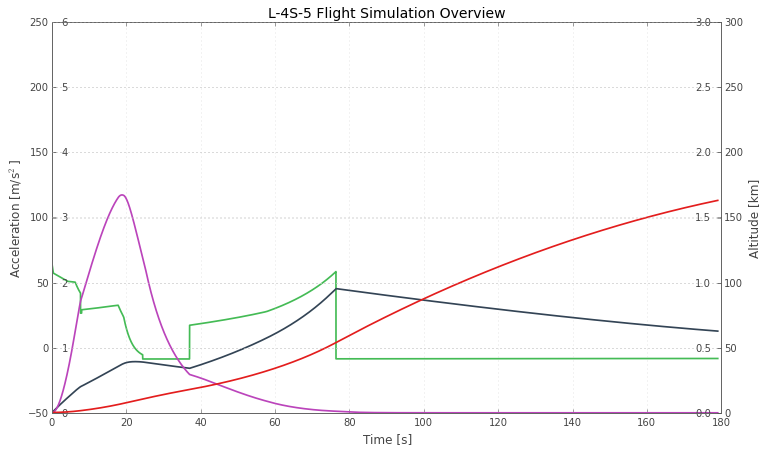

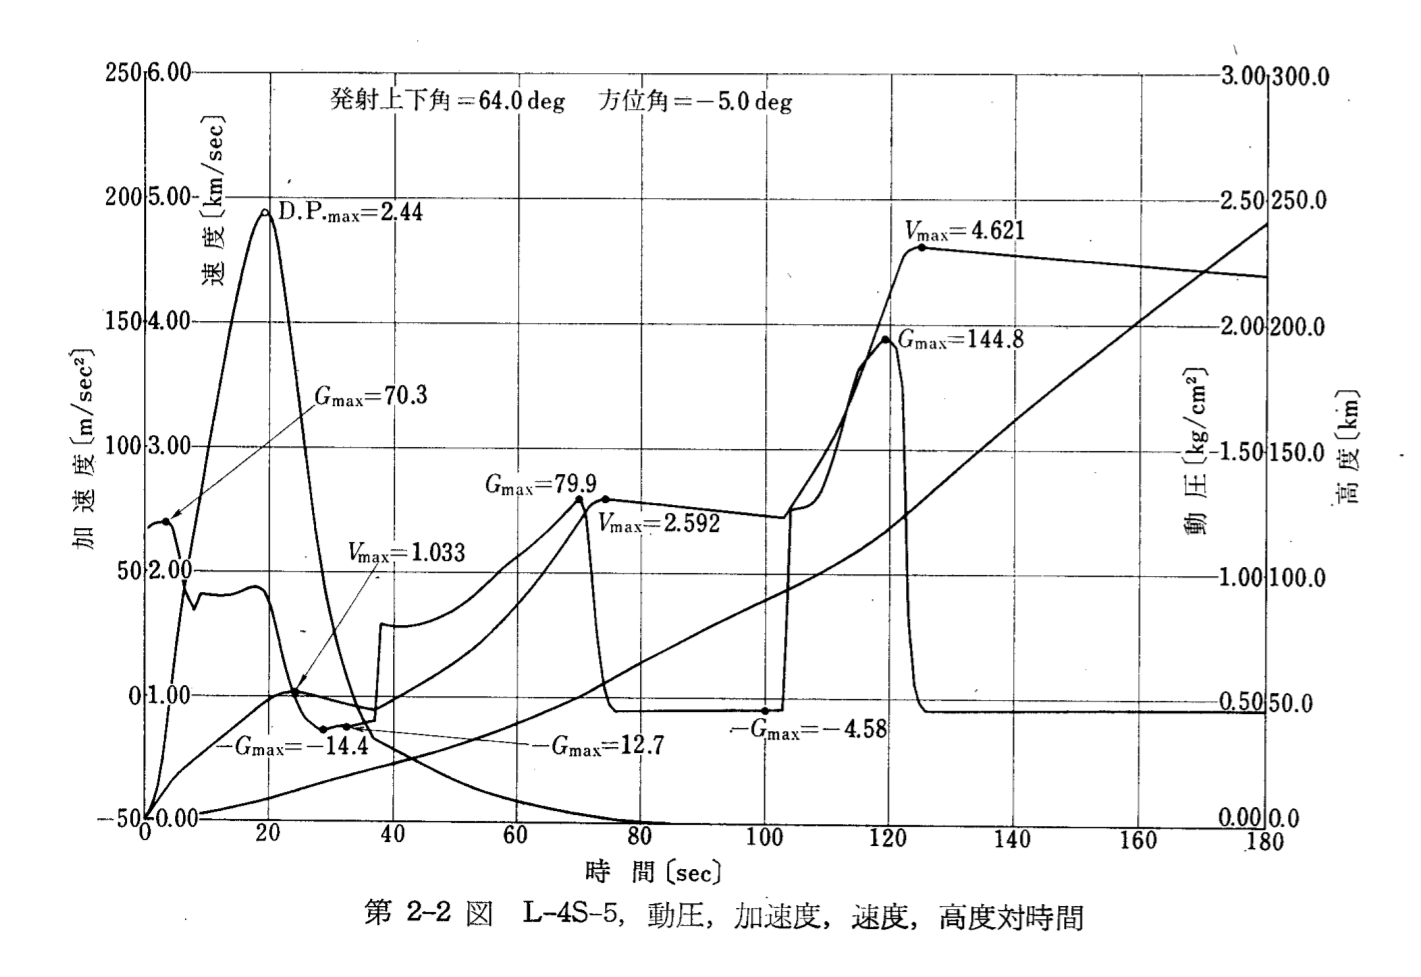

In [1]:
from numpy import loadtxt, array, arange
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

columns = loadtxt("data.csv", delimiter=',', unpack=True, comments="T")

times              = columns[ 0]
MET                = columns[ 1]
altitudeMsl        = columns[ 2]
latitude           = columns[ 3]
longitude          = columns[ 4]
thrust             = columns[ 5] * 4.44822   # to newtons
total_mass         = columns[ 6] * 0.453592  # to kg
pitch              = columns[ 7]
ecei_vmag          = columns[ 8] * 0.3048    # to m/s
eci_vmag           = columns[ 9] * 0.3048    # to m/s
qbar               = columns[10] * 4.882e-4  # to kg/cm2
acc_u              = columns[11] * 0.3048    # to m/s2
acc_v              = columns[12] * 0.3048    # to m/s2
acc_w              = columns[13] * 0.3048    # to m/s2

accel = []
for i in range(len(acc_u)):
    accel.append(norm([acc_u[i], acc_v[i], acc_w[i]]))

fig, ax1 = plt.subplots(figsize=(12,7))
plt.title("L-4S-5 Flight Simulation Overview")
plt.xlabel(r"Time [s]")

ax1.set_ylabel(r"Acceleration [m/s$^2$]")
ax1.plot(MET, acc_u, color='#44bb55')
ax1.set_ylim([-50,250])
ax1.set_xlim([0,180])


ax2 = ax1.twinx()
#ax2.set_ylabel(r"Velocity [km/s]")
ax2.plot(MET, ecei_vmag/1000, color='#334455')
ax2.set_ylim([0,6])
ax2.set_xlim([0,180])
ax2.get_yaxis().set_tick_params(direction='in', pad=-15)

ax3 = ax2.twinx()
#ax3.set_ylabel(r"Dynamic Pressure [kg/cm$^2$]")
ax3.plot(MET, qbar, color='#bb44bb')
ax3.set_ylim([0,3])
ax3.set_xlim([0,180])
ax3.get_yaxis().set_tick_params(direction='in', pad=-25)

ax4 = ax1.twinx()
ax4.set_ylabel(r"Altitude [km]")
ax4.plot(MET, altitudeMsl/1000)
ax4.set_ylim([0,300])
ax4.set_xlim([0,180])



plt.show()

from IPython.display import Image
Image(filename='original-charts/L-4S-5-flightplan.png') 

## First Stage Thrust

An earlier text had the first stage thrust profile of Lambda-4S-2.

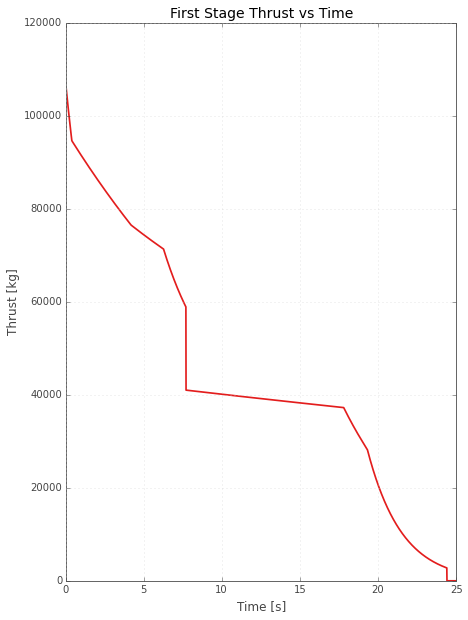

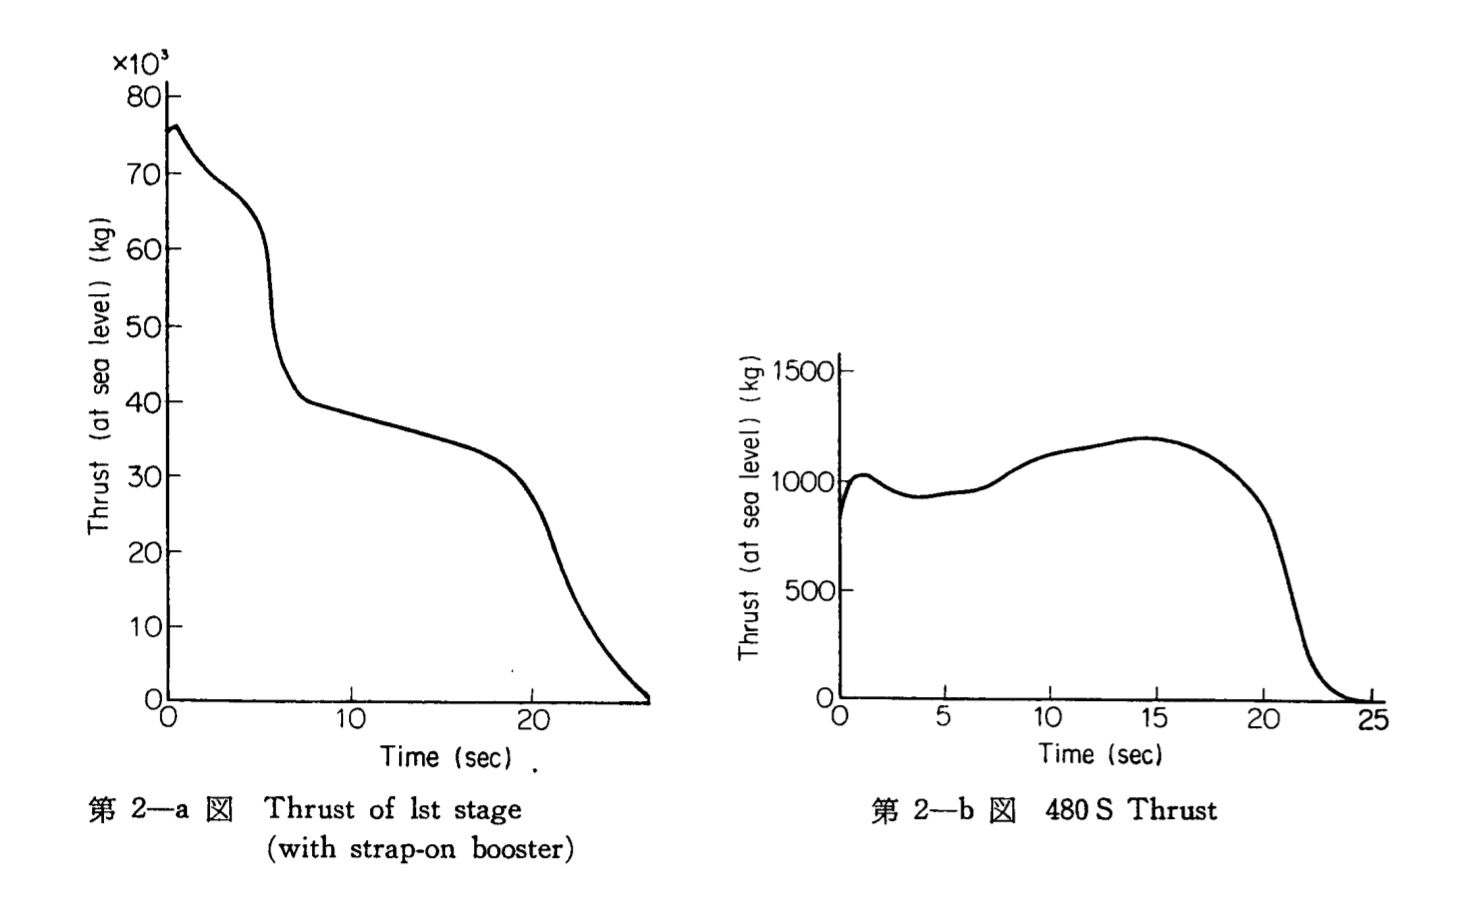

In [2]:
ax = plt.figure(figsize=(7,10))
plt.title(r"First Stage Thrust vs Time")
plt.ylabel(r"Thrust [kg]")
plt.xlabel(r"Time [s]")
plt.plot(MET, thrust/9.8)
ax.axes[0].set_xlim([0,25])
plt.show()

Image(filename='original-charts/L-4S-2-thrust.png') 

## Map

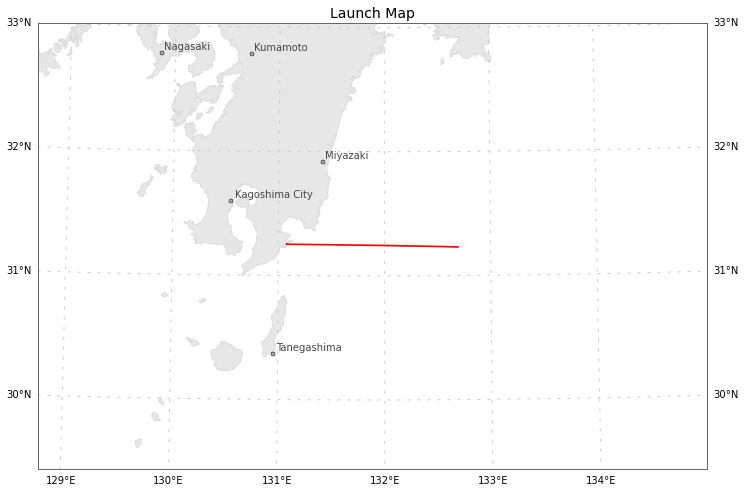

In [3]:
from mpl_toolkits.basemap import Basemap
ax = plt.figure(figsize=(12,12))
plt.title("Launch Map")

midlat = (latitude[-1]  + latitude[0])  / 2.0
midlon = (longitude[-1] + longitude[0]) / 2.0
m = Basemap(projection='aea',
            lat_0=midlat,lon_0=midlon,
            width=600000,height=400000,resolution ='h')

m.fillcontinents(color='#e7e7e7')
m.drawcoastlines(color='#dddddd')
m.drawcountries(color='#aaaaaa')
m.drawparallels(arange(25,45,1),labels=[1,1,0,0], color='#cccccc', dashes=(3,7))
m.drawmeridians(arange(125,135,1),labels=[0,0,0,1], color='#cccccc', dashes=(3,7))

lons = [129.866667, 130.55, 130.733333, 131.416667, 130.9587457]
lats = [ 32.783333,   31.6,   32.783333,  31.916667, 30.3692168]
labels = ['Nagasaki', 'Kagoshima City', 'Kumamoto', 'Miyazaki', 'Tanegashima']
cx,cy = m(lons, lats)
m.plot(cx, cy, 'o', color="#aaaaaa", markersize=4)
for label, xpt, ypt in zip(labels, cx, cy):
    plt.text(xpt+3000, ypt+3000, label, color="#444444")

x, y = m(longitude, latitude)
m.plot(x,y, color='r')
plt.show()